In [11]:
%matplotlib notebook
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [89]:
data = pd.read_csv('data/soc-sign-bitcoinotc.csv', header=None, names = ["from", "to", "weight", "timestamp"])
#print(data)
data['weight'] = 21 - (data['weight'] + 10)
print(data)

subset = data[['from', 'to', 'weight']]
tuples = [tuple(x) for x in subset.values]
#print(tuples)

g = nx.DiGraph()
g.add_weighted_edges_from(tuples)

print(g.degree(2))
print(len(g))
print(nx.info(g))

       from    to  weight     timestamp
0         6     2       7  1.289242e+09
1         6     5       9  1.289242e+09
2         1    15      10  1.289243e+09
3         4     3       4  1.289245e+09
4        13    16       3  1.289254e+09
5        13    10       3  1.289254e+09
6         7     5      10  1.289363e+09
7         2    21       6  1.289371e+09
8         2    20       6  1.289371e+09
9        21     2       6  1.289381e+09
10       21     1       3  1.289441e+09
11       21    10       3  1.289441e+09
12       21     8       2  1.289441e+09
13       21     3       4  1.289442e+09
14       17     3       6  1.289442e+09
15       17    23      10  1.289490e+09
16       10     1       3  1.289556e+09
17       10     6       4  1.289556e+09
18       10    21       3  1.289556e+09
19       10     8      10  1.289556e+09
20       10    25       1  1.289556e+09
21       10     2       4  1.289556e+09
22       10     3       4  1.289556e+09
23        4    26      10  1.289642e+09


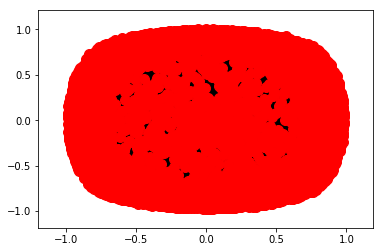

In [49]:

pos = nx.spring_layout(g, k=0.25, iterations=20)
#pos = nx.circular_layout(g)
nx.draw_networkx(g, pos = pos, with_labels = False, node_size = 100)
plt.savefig('graph.pdf')

In [90]:
import operator
def sorted_map(map):
    ms = sorted(map.items(), key=operator.itemgetter(1), reverse=True)
    return ms

eg = nx.degree(g)
print(nx.info(g))
deg_cen = sorted_map(nx.degree_centrality(g))
eigenvector_cen = sorted_map(nx.eigenvector_centrality(g))


max_num = 30

print(30*'-')
print(deg_cen[0:max_num])

print(30*'-')
print(eigenvector_cen[0:max_num])

#print(nx.degree_histogram(g))


Name: 
Type: DiGraph
Number of nodes: 5881
Number of edges: 35592
Average in degree:   6.0520
Average out degree:   6.0520
------------------------------
[(35, 0.22074829931972786), (2642, 0.1391156462585034), (1810, 0.12159863945578231), (2125, 0.09812925170068026), (2028, 0.09727891156462584), (905, 0.08979591836734693), (4172, 0.08265306122448979), (7, 0.07619047619047618), (1, 0.075), (4197, 0.06887755102040816), (13, 0.06819727891156462), (1018, 0.06496598639455782), (2296, 0.0586734693877551), (1953, 0.05680272108843537), (2388, 0.05663265306122449), (4291, 0.05612244897959183), (1334, 0.055782312925170066), (546, 0.05289115646258503), (1386, 0.05204081632653061), (3988, 0.05187074829931972), (2067, 0.05153061224489795), (2045, 0.05068027210884354), (1396, 0.047619047619047616), (1352, 0.04625850340136054), (1899, 0.04591836734693877), (3735, 0.044557823129251696), (2942, 0.04268707482993197), (202, 0.04115646258503401), (3897, 0.03945578231292517), (3129, 0.038945578231292514)]


In [91]:
closeness_cen = sorted_map(nx.closeness_centrality(g))
print(30*'-')
print(closeness_cen[0:max_num])

betweenness_cen = sorted_map(nx.betweenness_centrality(g))
print(30*'-')
print(betweenness_cen[0:max_num])

------------------------------
[(905, 0.3393980425132191), (35, 0.331224398123012), (1, 0.3309941813389126), (2642, 0.32729751092877013), (13, 0.32073943653905407), (2388, 0.31838066414933014), (1810, 0.3171614241767303), (1334, 0.31652899860509176), (353, 0.31563736762310557), (4172, 0.3138949515704774), (2028, 0.31312098522321724), (1832, 0.3130952520719004), (4291, 0.3125558312585843), (2067, 0.31120266518631634), (7, 0.31018914079228826), (1018, 0.3099872276005602), (2125, 0.30915710680929026), (57, 0.3083064681727672), (1565, 0.30805717047067877), (304, 0.3064218633645045), (1386, 0.3063725795907426), (546, 0.30543919082906157), (592, 0.3054147047627773), (41, 0.3024565756756815), (2045, 0.3022406209608), (25, 0.3021844535880607), (1396, 0.30197709473770484), (4197, 0.30180963536488037), (1899, 0.3012130793177486), (550, 0.3005477301365482)]
------------------------------
[(35, 0.14211022254570446), (2642, 0.06220168253637525), (1810, 0.049533487572168064), (905, 0.048142532048893

In [96]:
data_df = pd.DataFrame({
    'degree_cen': dict(deg_cen),
    'eigenvector_cen': dict(eigenvector_cen),
    'betweenness_cen': dict(betweenness_cen),
    'closeness_cen': dict(closeness_cen)
    
})

data_df.to_pickle('data/graph_data.pkl')

print(data_df.loc[3744])
print(data_df.loc[2498])
print(data_df.loc[1383])

betweenness_cen    0.003316
closeness_cen      0.298009
degree_cen         0.019218
eigenvector_cen    0.066411
Name: 3744, dtype: float64
betweenness_cen    0.000000
closeness_cen      0.291210
degree_cen         0.007653
eigenvector_cen    0.050562
Name: 2498, dtype: float64
betweenness_cen    0.007559
closeness_cen      0.297381
degree_cen         0.027551
eigenvector_cen    0.058603
Name: 1383, dtype: float64


In [94]:
print(data_df.loc[3744])
print(data_df.loc[2498])
print(data_df.loc[1383])

betweenness_cen    0.003316
closeness_cen      0.298009
degree_cen         0.019218
eigenvector_cen    0.066411
Name: 3744, dtype: float64
betweenness_cen    0.000000
closeness_cen      0.291210
degree_cen         0.007653
eigenvector_cen    0.050562
Name: 2498, dtype: float64
betweenness_cen    0.007559
closeness_cen      0.297381
degree_cen         0.027551
eigenvector_cen    0.058603
Name: 1383, dtype: float64


<IPython.core.display.Javascript object>


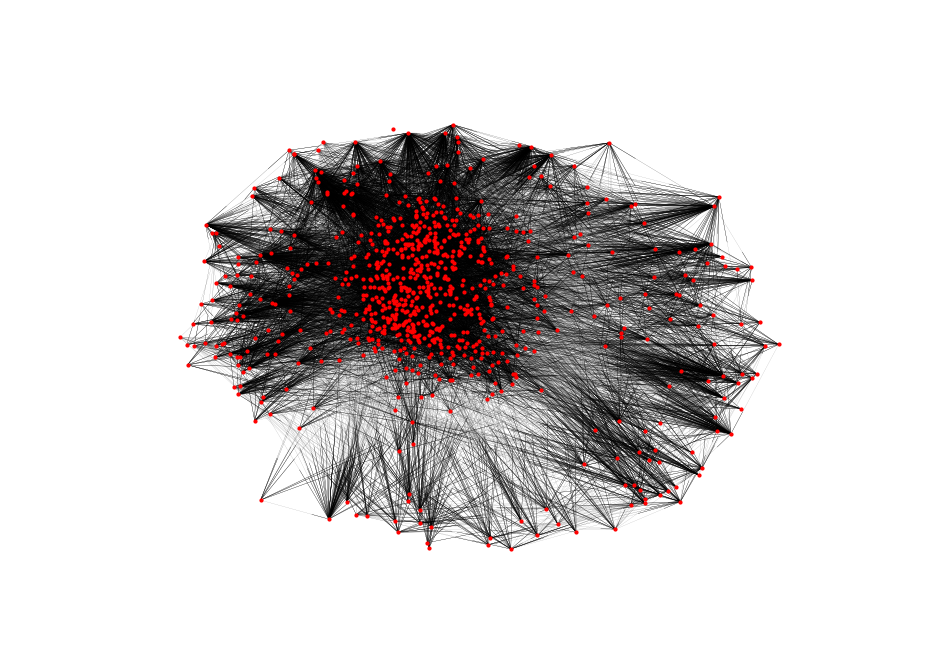

(-0.91933761507272715,
 1.1794281449913977,
 -1.1769370603561402,
 0.86205192089080818)

In [58]:
def trim_degrees(g, degree=1):
    g2 = g.copy()
    d = nx.degree(g2)
    for n in g.nodes():
        if d[n]<=degree:
            g2.remove_node(n)
    return g2

core = trim_degrees(g)
len(core)

core = trim_degrees(g, degree=15)
len(core)
nx.draw_networkx(core, with_labels=False, font_size=9, font_color='b', width=0.05, node_size=4)
plt.axis('off')

In [59]:
cc = nx.closeness_centrality(core)
print(cc)

{6: 0.4601804289112274, 2: 0.4042001880555915, 1: 0.5310235999634452, 15: 0.37828028752042814, 4: 0.4266557540586799, 3: 0.3965225841889551, 13: 0.5110227110759331, 7: 0.4924737923435943, 21: 0.38362826519508075, 17: 0.4000290804638631, 23: 0.4066229664055751, 25: 0.48689945003631835, 26: 0.35673057788955365, 28: 0.36586929381751065, 29: 0.4098988815427801, 35: 0.5251994701573944, 36: 0.3784561500436826, 37: 0.3624484322101341, 39: 0.3791612383530327, 45: 0.32011764795279646, 19: 0.3730793669770675, 51: 0.39690842454605624, 41: 0.4782956396850537, 57: 0.4892182564567075, 69: 0.35845846708232554, 72: 0.35501926678759765, 75: 0.3437749910236323, 64: 0.44387087172516976, 77: 0.33652715119634613, 78: 0.3657049320502971, 60: 0.3919399031025331, 80: 0.370869785304766, 62: 0.430036544502885, 104: 0.44679428032050567, 96: 0.436492857235368, 100: 0.37986895881659416, 110: 0.39024888722145795, 112: 0.3480372718016081, 115: 0.38399017865281193, 132: 0.3848979568529368, 113: 0.42179232059272603, 1

In [60]:
from operator import itemgetter